In [1]:
from dataset_maker import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


/Users/gcodes/anaconda3/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [9]:
convert_acdc_dataset("/Users/gcodes/Downloads/ACDC_Dataset/training",
                     "ACDC_split/training_8-2", 
                     load_labels=True, val_ratio=0.2)

In [1]:
import numpy as np
import os
import nibabel as nib
import pickle
import imageio
import scipy.io
import gzip
import random


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


/Users/gcodes/anaconda3/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [7]:
res = nib.load("/Users/gcodes/Downloads/ACDC_Dataset/training/patient001/patient001_4d.nii.gz")

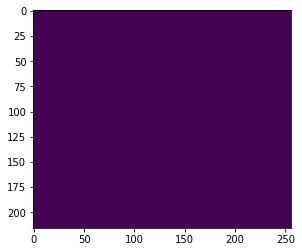

In [53]:
import matplotlib.pyplot as plt
ed = 2
x = res.get_fdata()
a = np.flip(x,axis=-1)[:,:,0,x.shape[3]-(ed-1)-5:x.shape[3]-(ed-1)][:,:,-1]
b = x[:,:,0,1]
plt.imshow(a-b)
plt.show()

In [24]:
with open(os.path.join("/Users/gcodes/Downloads/ACDC_Dataset/training/patient001/Info.cfg"), 'r') as meta_file:
    metadata = [l.strip().split(' ') for l in meta_file.readlines()]

In [25]:
metadata

[['ED:', '1'],
 ['ES:', '12'],
 ['Group:', 'DCM'],
 ['Height:', '184.0'],
 ['NbFrame:', '30'],
 ['Weight:', '95.0']]

In [28]:
ed_frame = metadata[0][1]
es_frame = metadata[1][1]

In [30]:
es_frame

'12'

In [2]:
convert_acdc_dataset_timeseries("/Users/gcodes/Downloads/ACDC_Dataset/training",
                     "ACDC_split_ts6/training_8-2", num_frames=6,
                     load_labels=True, val_ratio=0.2)

In [31]:
a = np.load("/Users/gcodes/Downloads/ACDC_split_ts4/training_8-2/patient002/patient002_frame04-01_slice01.npy")
b = nib.load("/Users/gcodes/Downloads/ACDC_Dataset/training/patient002/patient002_4d.nii.gz").get_fdata()

In [39]:
a = np.load("/Users/gcodes/Downloads/ACDC_Dataset/training_p/patient001/patient001_frame01_gt_slice1.pkl", allow_pickle=True)

In [46]:
np.sum(a[:,:] - y[:,:,0])

0.0

In [3]:
from transforms import *

In [4]:
a.shape

(232, 256, 4)

In [32]:
%%time
res = PadOrCenterCrop((176,176))(DownsampleShortAxis(176)(CLAHE(clipLimit=2.0, tileGridSize=(8,8))(a)))
res.shape

CPU times: user 78.2 ms, sys: 25 ms, total: 103 ms
Wall time: 19.6 ms


(176, 176, 4)

In [29]:
import matplotlib.pyplot as plt
for i in range(res.shape[2]):
    plt.imshow(res[:,:,i])
    plt.show()

IndexError: tuple index out of range

In [25]:
x = np.random.rand(3,4,5)
x.min(axis=(0,1))

array([1.23311258e-02, 1.27252427e-01, 2.98465682e-01, 1.89090267e-01,
       2.87687597e-04])

In [33]:
import torch

In [38]:
torch.from_numpy((res.transpose((2,0,1)))).shape

torch.Size([1, 4, 176, 176])